<a href="https://colab.research.google.com/github/DarekGit/FACES_DNN/blob/master/notebooks/WIDERFACE_Detectron2_from_scratch_DD_mobilenet_v2_Mish_V22F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detectron2 z backbone na Mibilenet_v2 z BN,Mish

LR=2-3 zwiekszony z 1-3 w BN_Mish

Gamma=0.3

Scheduler 150/210/270/330k zmienione wydluzony pierwszy, dalej skrocone

Max 400k zmniejszony z 800k w BN_Mish

douczenie po 250k BN_Mish_V2:

LR = 1-3

MAX_ITER = 70000    

STEPS = [30000,50000] 

GAMMA = 0.2

BNFrozen

In [ ]:
import torch
from torch import nn
import numpy as np

class Mish(nn.Module):
    def __init__(self):
        super().__init__()
  
    def forward(self, x):
        x = x * (torch.tanh(nn.functional.softplus(x)))
        return x

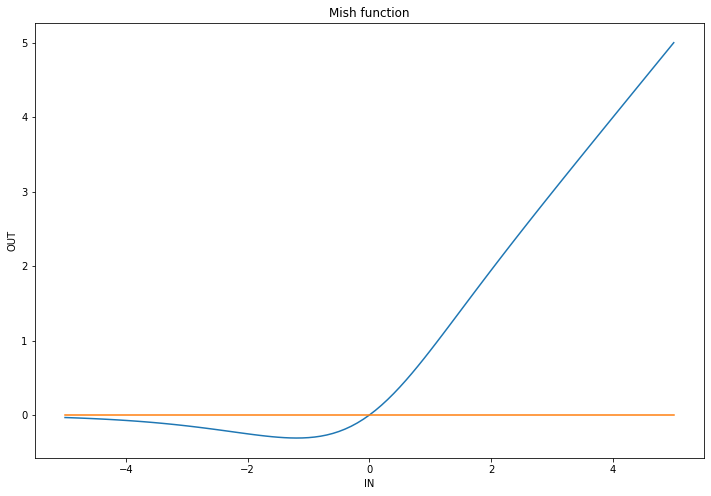

In [ ]:
mish=Mish()
x=np.arange(-5,5.1,0.1)
y,z=[],[]
for i in x:
  y.append([mish(torch.tensor([i],dtype=float)),0])
  
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(x,y)
plt.title("Mish function")
plt.ylabel("OUT")
plt.xlabel("IN")
fig.savefig('Mish function.jpg')
plt.show()

# Install detectron2

Detectron2  https://github.com/facebookresearch/detectron2 <br>
Detectron2 Beginner's Tutorial https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5 <br>
Documentation https://detectron2.readthedocs.io <br>
Detectron2 Model Zoo and Baselines https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md <br>
Rethinking ImageNet Pre-training https://arxiv.org/pdf/1811.08883.pdf <br>

Wykorzystano kody z <br>
https://github.com/youngwanLEE/vovnet-detectron2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
def Wider_load(val=True,train=True,test=False):
  os.makedirs('WIDER/', exist_ok=True)

  if val:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
    !gdown https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr -O WIDER/tempv.zip
    !unzip -q WIDER/tempv.zip -d WIDER
    !rm WIDER/tempv.zip  

  if train:
    ### WIDER Face Training Images
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
    !gdown https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH -O WIDER/temptr.zip
    !unzip -q WIDER/temptr.zip -d WIDER
    !rm WIDER/temptr.zip
  
  if test:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
    !gdown https://drive.google.com/uc?id=1tTpUJZEQMKDVxKT6100V5FwDuGX_8sDi -O WIDER/tempt.zip
    !unzip -q WIDER/tempt.zip -d WIDER
    !rm WIDER/tempt.zip


  ### Face annotations
  !wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip -O WIDER/tempa.zip
  !unzip -q WIDER/tempa.zip -d WIDER
  !rm WIDER/tempa.zip

  #annotations
  !gdown https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN -O WIDER/tools.py


  ### Examples and formats of the submissions
  #!wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/example/Submission_example.zip


In [ ]:
def repo_load():
  !pip install cython pyyaml==5.1
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  # install detectron2:
  !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
  !pip install -q -e detectron2_repo

  !gdown https://drive.google.com/uc?id=1U0SVkSaSio4TBiXvF1QfTZI65WYpXpZ9
  !unzip -qo mobilenet.zip
  !rm -f mobilenet.zip

repo_load()

     |████████████████████████████████| 276kB 4.4MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=95a3f24b5fb3d3856063fb828b92c25c970d45671aeb4ba078082c6ce0301691
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-4nsmcmxk
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-4nsmcmxk
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=267007 sha256=aca8c79bc4e82b659cf21362bd59c17c8f30df9d096495c563976da253526f65
  Stored in directory: /tmp/pip-ephem-wheel-cache-tk9exzm4/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing install

In [ ]:
Wider_load()

Downloading...
From: https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr
To: /content/WIDER/tempv.zip
363MB [00:03, 91.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH
To: /content/WIDER/temptr.zip
1.47GB [00:17, 84.6MB/s]
--2020-06-03 14:44:26--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘WIDER/tempa.zip’

WIDER/tempa.zip     100%[===================>]   3.42M  3.63MB/s    in 0.9s    

2020-06-03 14:44:28 (3.63 MB/s) - ‘WIDER/tempa.zip’ saved [3591642/3591642]

Downloading...
From: https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN
To: /content/WIDER/tools.py
100% 4.23k/4.23k [00:00<00:00, 6.43MB/s]


<font color=red> Restart runtime to continue... <b>Crtl+M.</b> </font>

In [ ]:
!nvidia-smi
from psutil import virtual_memory
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(virtual_memory().total / 1e9))

Wed Jun  3 14:58:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from google.colab import drive
import os
import cv2
import random
import itertools
import shutil
import glob
import json
import numpy as np
import pandas as pd
from PIL import ImageDraw, Image
from collections import defaultdict
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
import detectron2.utils.comm as comm
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader
from detectron2.structures import BoxMode
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

In [ ]:
from mobilenet.utils import  add_mobilenet_config, build_mobilenetv2_fpn_backbone
from WIDER.tools import annotations,output_Files
output_files=output_Files()

# Prepare the dataset

## WIDER FACE: A Face Detection Benchmark
http://shuoyang1213.me/WIDERFACE/ <br>

https://arxiv.org/pdf/1511.06523.pdf <br>


In [ ]:
train = annotations("train")
val = annotations('val')

In [ ]:
for d in ["train", "val"]:
  DatasetCatalog.register("face_" + d, lambda d=d: train if d == "train" else val)
  MetadataCatalog.get("face_" + d).set(thing_classes = ['face'])

faces_metadata = MetadataCatalog.get("face_train")

# "Base-RCNN-MobileNet-FPN_v1.yaml"
mobilenet/configs


In [ ]:
cfg = get_cfg()

cfg_file='Base-RCNN-MobileNet-FPN_V1.yaml'
cfg.merge_from_file('mobilenet/configs/'+cfg_file)
add_mobilenet_config(cfg)
cfg.MODEL.MOBILENET.NORM='FrozenBN'
cfg.MODEL.MOBILENET.ACTIVATION='Mish'
cfg.MODEL.PIXEL_MEAN =(119.857,110.808,104.148)
#cfg.MODEL.PIXEL_STD =(77.168,74.631,75.842)
cfg.MODEL.PIXEL_STD =(0.6076259372440945, 0.5876417505511812, 0.5971849743307086)
cfg.INPUT.FORMAT='RGB'
cfg.MODEL.FORMAT='RGB'
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES=1
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class 


Loading config mobilenet/configs/Base-RCNN-MobileNet-FPN_V1.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [ ]:
cfg.DATASETS.TRAIN = ("face_train",)
cfg.DATASETS.TEST = ("face_val",)
cfg.DATALOADER.NUM_WORKERS = 4

#cfg.MODEL.WEIGHTS = "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" 

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001 #0.002  #  LR
cfg.SOLVER.MAX_ITER = 100000    

cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"
cfg.SOLVER.STEPS = [30000,50000] #[150000,210000,270000,330000]
cfg.SOLVER.GAMMA = 0.2
cfg.SOLVER.CHECKPOINT_PERIOD = 10000
cfg.MODEL.WEIGHTS = "./drive/My Drive/Face detection/WIDER_Mish_V2/model_0249999.pth" #douczanie od 250k

In [ ]:
# OUTPUT_DIR on Google Drive
drive.mount('/content/drive')

cfg.OUTPUT_DIR = os.path.join("./drive/My Drive/Face detection", "WIDER_Mish_V2/V22F2")
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# validation loss during training
# https://github.com/facebookresearch/detectron2/issues/810
# https://medium.com/@apofeniaco/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e


cfg.DATASETS.VAL = ("face_val",)

class Validation_Loss(HookBase):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg.clone()
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        self._loader = iter(build_detection_train_loader(self.cfg))
        
    def after_step(self):
        data = next(self._loader)
        with torch.no_grad():
            loss_dict = self.trainer.model(data)
            
            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            loss_dict_reduced = { k+"/val": v.item() for k, v in comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())
            loss_dict_reduced['total_loss/val']=losses_reduced
            if comm.is_main_process():
                self.trainer.storage.put_scalars(**loss_dict_reduced) #total_val_loss

In [ ]:
class Trainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, DATASETS=cfg.DATASETS.TEST, out=cfg.OUTPUT_DIR):
    return None
    '''
            COCOEvaluator(dataset_name=DATASETS, 
                         cfg=cfg, 
                         distributed=False, 
                         output_dir=out)
    '''

In [ ]:
print(cfg.dump())


CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - face_val
  TRAIN:
  - face_train
  VAL:
  - face_val
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: RGB
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 0
    NAME: build_mobilenetv2_fpn_bac

In [ ]:
import json
cfg_all=cfg_file.split('.')[-2]+'_ALL.json'
cfg_all = os.path.join(cfg.OUTPUT_DIR, cfg_all)
with open(cfg_all,'w') as f:
  json.dump(cfg,f)


In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 

'''
val_loss = Validation_Loss(cfg)  
trainer.register_hooks([val_loss])
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
'''

trainer.resume_or_load(resume=True)
trainer.train()

Streaming output truncated to the last 5000 lines.
[06/03 15:02:14 d2.utils.events]:  eta: 7:05:04  iter: 399  total_loss: 0.276  loss_cls: 0.060  loss_box_reg: 0.155  loss_rpn_cls: 0.010  loss_rpn_loc: 0.022  time: 0.2568  data_time: 0.0043  lr: 0.000400  max_mem: 8508M
[06/03 15:02:19 d2.utils.events]:  eta: 7:05:19  iter: 419  total_loss: 0.231  loss_cls: 0.062  loss_box_reg: 0.140  loss_rpn_cls: 0.008  loss_rpn_loc: 0.024  time: 0.2569  data_time: 0.0042  lr: 0.000420  max_mem: 8508M
[06/03 15:02:24 d2.utils.events]:  eta: 7:05:18  iter: 439  total_loss: 0.227  loss_cls: 0.058  loss_box_reg: 0.121  loss_rpn_cls: 0.009  loss_rpn_loc: 0.014  time: 0.2570  data_time: 0.0043  lr: 0.000440  max_mem: 8508M
[06/03 15:02:29 d2.utils.events]:  eta: 7:05:32  iter: 459  total_loss: 0.201  loss_cls: 0.052  loss_box_reg: 0.137  loss_rpn_cls: 0.007  loss_rpn_loc: 0.011  time: 0.2572  data_time: 0.0042  lr: 0.000460  max_mem: 8508M
[06/03 15:02:34 d2.utils.events]:  eta: 7:05:03  iter: 479  total

Użycie modelu

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("face_val", )
predictor = DefaultPredictor(cfg)

AP metric on val

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./Output/")
val_loader = build_detection_test_loader(cfg, "face_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [06/03 23:02:39 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'face_val'. Trying to convert it to COCO format ...
[06/03 23:02:39 d2.data.datasets.coco]: Converting annotations of dataset 'face_val' to COCO format ...)
[06/03 23:02:39 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/03 23:02:45 d2.data.datasets.coco]: Conversion finished, #images: 3226, #annotations: 39708
[06/03 23:02:45 d2.data.datasets.coco]: Caching COCO format annotations at './Output/face_val_coco_format.json' ...
[06/03 23:02:46 d2.data.common]: Serializing 3226 elements to byte tensors and concatenating them all ...
[06/03 23:02:46 d2.data.common]: Serialized dataset takes 3.16 MiB
[06/03 23:02:46 d2.evaluation.evaluator]: Start inference on 3226 images
[06/03 23:02:48 d2.evaluation.evaluator]: Inference done 11/3226. 0.0502 s / img. ETA=0:02:44
[06/03 23:02:53 d2.evaluation.evaluator]: Inference done 110/3226. 0.0493 s / img. ETA=0:02:38
[06/03 23:0

OrderedDict([('bbox',
              {'AP': 31.93090232138276,
               'AP50': 58.538810492956806,
               'AP75': 31.987857560560705,
               'APl': 64.9068460579368,
               'APm': 57.24235410071088,
               'APs': 21.160769566260267})])

In [ ]:
stop #po 50k iteracji

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./Output/")
val_loader = build_detection_test_loader(cfg, "face_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [06/02 11:07:11 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'face_val'. Trying to convert it to COCO format ...
[06/02 11:07:11 d2.data.datasets.coco]: Converting annotations of dataset 'face_val' to COCO format ...)
[06/02 11:07:11 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/02 11:07:17 d2.data.datasets.coco]: Conversion finished, #images: 3226, #annotations: 39708
[06/02 11:07:17 d2.data.datasets.coco]: Caching COCO format annotations at './Output/face_val_coco_format.json' ...
[06/02 11:07:18 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    face    | 39708        |
|            |              |
[06/02 11:07:18 d2.data.common]: Serializing 3226 elements to byte tensors and concatenating them all ...
[06/02 11:07:18 d2.data.common]: Serialized dataset takes 3.16 MiB
[06/02 11:07:18 d2.evaluation.evaluator]: Start inference on 3226 image

OrderedDict([('bbox',
              {'AP': 31.383777913812143,
               'AP50': 57.58033209424721,
               'AP75': 31.576026735550467,
               'APl': 64.57490537681063,
               'APm': 56.59133176372973,
               'APs': 20.543379428343346})])